In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
%matplotlib inline

In [237]:
df = pd.read_csv('flats.csv', sep=';',  encoding='cp1251', na_values='?')

In [238]:
df['Цена,руб'] = df['Цена,руб'].replace(to_replace=r'\s+', value='',regex=True).astype('int64')

In [239]:
df = df.sort_values(by='Цена,руб')
df = df.drop_duplicates(subset=['Улица', '№ дома', 'Дом', 'Площадь'], keep = 'first')
df = df.sort_index()

Категориальные переменные
* Метро – ближайшее метро
* Улица, номер дома, дом, - адрес
* Б – балкон
* Л – лифт
* Т – телефон
* С – санузел
* П – пол
* И – ипотека
* Статус – прямая продажа или возможна альтернатива – размен, например

Составляем частотные таблицы:

In [240]:
df

К                                              Метро От М  \
0      1.0                                 Новые Черемушки м.   3т   
1      1.0                                 Новые Черемушки м.   5т   
2      1.0                                 Новые Черемушки м.   5п   
3      1.0                                     Профсоюзная м.  10п   
5      1.0                                 Новые Черемушки м.  12п   
6      1.0                                   Академическая м.  10п   
8      2.0                                     Профсоюзная м.  10п   
9      1.0              Нагатинская м. (Академическая м., 5т)   5т   
10     1.0                                   Академическая м.  10п   
11     1.0                                     Профсоюзная м.  15п   
12     1.0                                 Новые Черемушки м.  10п   
13     1.0                                 Новые Черемушки м.  15п   
14     2.0             Калужская м. (Новые Черемушки м., 15п)  15п   
15     2.0             Каховская м. (Новые Черемушки м., 15п)  15п   
16     1.0       Севастопольская м. (Новые Черемушки м., 15п)  15п   
17     2.0             Каховская м. (Новые Черемушки м., 15п)  15п   
18     2.0             Каховская м. (Новые Черемушки м., 15п)  15п   
19     2.0             Калужская м. (Новые Черемушки м., 15п)  15п   
20     2.0                                 Новые Черемушки м.  10п   
23     2.0             Каховская м. (Новые Черемушки м., 15п)  15п   
24     1.0                Нагорная м. (Академическая м., 15п)  10п   
25     1.0  Проспект Вернадского м. (Новые Черемушки м., 10т)  12п   
26     1.0                                   Академическая м.  15п   
28     2.0                                     Профсоюзная м.   5п   
29     1.0                 Нагорная м. (Академическая м., 5т)  12п   
30     1.0               Беляево м. (Новые Черемушки м., 10т)  15п   
31     2.0                                 Новые Черемушки м.  15п   
32     2.0                                 Новые Черемушки м.   7п   
33     1.0                                 Новые Черемушки м.  15п   
34     2.0               Беляево м. (Новые Черемушки м., 10т)  15п   
...    ...                                                ...  ...   
10098  5.0                                 Новые Черемушки м.   5п   
10099  4.0                                   Академическая м.  10п   
10100  4.0                                     Профсоюзная м.  10п   
10101  7.0                                     Профсоюзная м.   7п   
10102  NaN                                 Новые Черемушки м.  15п   
10103  5.0                                     Профсоюзная м.  15п   
10104  6.0                                     Профсоюзная м.   7п   
10106  9.0                                 Новые Черемушки м.   3т   
10108  6.0                                 Новые Черемушки м.  10п   
10109  4.0                                   Академическая м.   7п   
10110  4.0                                     Профсоюзная м.   4п   
10111  7.0                                 Новые Черемушки м.  12п   
10112  8.0                                 Новые Черемушки м.  15п   
10113  4.0                                 Новые Черемушки м.  10п   
10114  4.0                                     Профсоюзная м.  10п   
10115  4.0                                 Новые Черемушки м.  10п   
10116  5.0                                 Новые Черемушки м.  11п   
10118  5.0                                 Новые Черемушки м.   5п   
10120  4.0                                 Новые Черемушки м.  NaN   
10121  4.0                 Калужская м. (Профсоюзная м., 20т)  20т   
10122  3.0                                 Новые Черемушки м.  15п   
10123  7.0                                     Профсоюзная м.   5п   
10124  6.0                                 Новые Черемушки м.  10п   
10125  6.0                                 Новые Черемушки м.   3т   
10127  3.0                                     Профсоюзная м.   7п   
10130  5.0         

In [301]:
balcony = df[['Б']]
balcony.insert(1,'Количество', 1)
balcony = balcony.fillna('NaN').groupby('Б').sum()
balcony

Количество
Б               
-            716
2Б           142
2Б2Л          10
2Л           362
3Б            14
3Л            47
4Л            18
NaN         4866
Б           1429
Б2Л            8
БЛ           117
Л           1085
Эрк           10
ЭркЛ           5

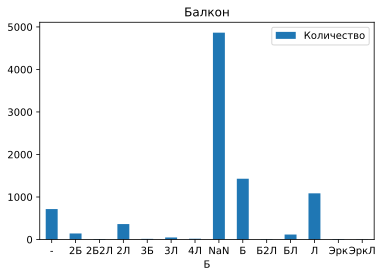

In [302]:
balcony.plot(kind='bar', rot=0,title='Балкон')

In [305]:
elevator = df[['Л']]
elevator.insert(1,'Количество', 1)
elevator = elevator.fillna('NaN').groupby('Л').sum()
elevator 

Количество
Л                       
NaN                 5354
груз.                  8
есть                1135
нет                  180
пасс.                545
пасс.+ груз.        1607

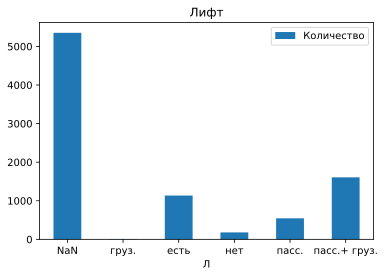

In [306]:
elevator.plot(kind='bar', rot=0,title='Лифт')

In [309]:
phone = df[['Т']]
phone.insert(1,'Количество', 1)
phone = phone.fillna('NaN').groupby('Т').sum()
phone

Количество
Т              
-          1650
2Т            2
NaN        3423
Т          3754

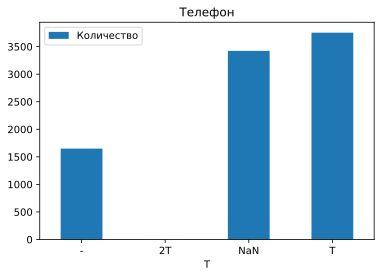

In [310]:
phone.plot(kind='bar', rot=0,title='Телефон')

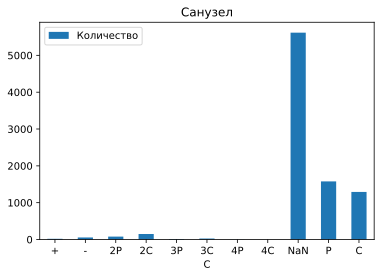

In [288]:
bathroom = df[['С']]
bathroom.insert(1,'Количество', 1)
bathroom.fillna('NaN').groupby('С').sum().plot(kind='bar', rot=0,title='Санузел')

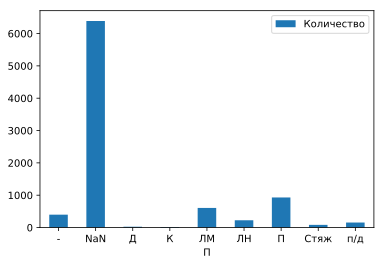

In [289]:
floor = df[['П']]
floor.insert(1,'Количество', 1)
floor.fillna('NaN').groupby('П').sum().plot(kind='bar',rot =0,title='')

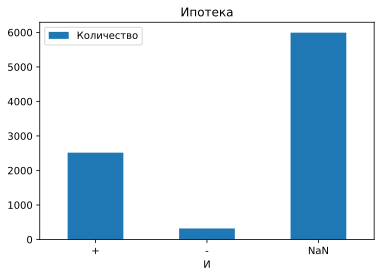

In [290]:
mortgage = df[['И']]
mortgage.insert(1,'Количество', 1)
mortgage.fillna('NaN').groupby('И').sum().plot(kind='bar', rot =0, title='Ипотека')

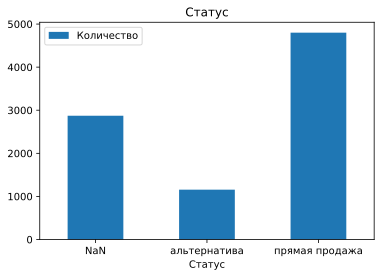

In [291]:
status = df[['Статус']]
status.insert(1,'Количество', 1)
status.fillna('NaN').groupby('Статус').sum().plot(kind='bar', rot =0, title='Статус')

In [294]:
#имеет смысл распарсить и объединить как-нибудь
metro = df[['Метро']]
metro.insert(1,'Количество', 1)
metro.fillna('NaN').groupby('Метро').sum() #.plot(kind='bar', rot =0, title='Метро')

Количество
Метро                                                        
Абабурово пос. (Академическая м., 29т)                      1
Академическая м.                                         1998
Алексеевская м. (Академическая м., 15п)                     1
Алтуфьево м. (Новые Черемушки м., 12п)                      1
Бауманская м. (Новые Черемушки м., 15п)                     1
Белорусская м. (Профсоюзная м., 21п)                        1
Беляево м. (Новые Черемушки м., 10т)                       45
Библиотека им.Ленина м. (Академическая м., 5п)              1
Бульвар Дмитрия Донского м. (Профсоюзная м., 21п)           1
Войковская м. (Профсоюзная м., 15п)                         1
Воробьевы Горы м. (Академическая м., 15п)                  13
Воробьевы Горы м. (Академическая м., 17п)                   1
Воробьевы Горы м. (Академическая м., 18п)                   4
Воробьевы Горы м. (Академическая м., 21п)                   4
Выхино м. (Профсоюзная м., 12п)                             1
Калужская м. (Академическая м., 6п)                         1
Калужская м. (Новые Черемушки м.)                           3
Калужская м. (Новые Черемушки м., 10п)                      2
Калужская м. (Новые Черемушки м., 10т)                      3
Калужская м. (Новые Черемушки м., 12п)                      1
Калужская м. (Новые Черемушки м., 15п)                    131
Калужская м. (Новые Черемушки м., 15т)                      3
Калужская м. (Новые Черемушки м., 16п)                      3
Калужская м. (Новые Черемушки м., 17п)                      2
Калужская м. (Новые Черемушки м., 20п)                      1
Калужская м. (Новые Черемушки м., 21п)                      2
Калужская м. (Новые Черемушки м., 22п)                      4
Калужская м. (Новые Черемушки м., 23п)                      1
Калужская м. (Новые Черемушки м., 24п)                      4
Калужская м. (Новые Черемушки м., 26п)                      9
...                                                       ...
Университет м. (Профсоюзная м., 12п)                        2
Университет м. (Профсоюзная м., 14п)                        3
Университет м. (Профсоюзная м., 15п)                      227
Университет м. (Профсоюзная м., 16п)                        3
Университет м. (Профсоюзная м., 17п)                        2
Университет м. (Профсоюзная м., 18п)                       16
Университет м. (Профсоюзная м., 20п)                       11
Университет м. (Профсоюзная м., 20т)                        1
Университет м. (Профсоюзная м., 21п)                        4
Университет м. (Профсоюзная м., 22п)                        4
Университет м. (Профсоюзная м., 23п)                        1
Университет м. (Профсоюзная м., 24п)                        1
Университет м. (Профсоюзная м., 26п)                        2
Университет м. (Профсоюзная м., 27п)                        3
Университет м. (Профсоюзная м., 28п)                        1
Университет м. (Профсоюзная м., 29п)                        2
Университет м. (Профсоюзная м., 30п)                        3
Университет м. (Профсоюзная м., 4т)                         1
Университет м. (Профсоюзная м., 5т)                        28
Фрунзенская м. (Академическая м., 5т)                       1
Фрунзенская м. (Новые Черемушки м., 11п)                    1
Щелковская м. (Академическая м., 22п)                       1
Щелковская м. (Профсоюзная м., 21п)                         1
Юго-Западная м. (Новые Черемушки м., 15п)                   1
Юго-Западная м. (Новые Черемушки м., 20т)                   1
Юго-Западная м. (Новые Черемушки м., 5т)                    1
Юго-Западная м. (Профсоюзная м., 15п)                       1
Юго-Западная м. (Профсоюзная м., 21п)                       2
Юго-Западная м. (Профсоюзная м., 9п)                        1
Ясенево м. (Академическая м., 2п)                           1

[218 rows x 1 columns]

In [296]:
#есть ли смысл объединять?
street = df[['Улица']]
street.insert(1,'Количество', 1)
street.fillna('NaN').groupby('Улица').sum()#.plot(kind='bar', rot =0, title='Метро')

Количество
Улица                                 
10-летия Октября ул.                 1
40 лет Октября пр-т                  2
60-летия Октября пр-т              198
800-летия Москвы ул.                 1
???                                  5
Азовская ул.                         1
Академика Волгина ул.                3
Академика Зелинского ул.             5
Академика Пилюгина ул.             253
Академика Челомея ул.               24
Академический пр.                    4
Архитектора Власова ул.            287
Балаклавский пр-т                    2
Бианки ул.                           1
Бирюлевская ул.                      1
Бобруйская ул.                       1
Богданова ул.                        2
Болотниковская ул.                  18
Большая ул.                          1
Боровское ш.                         1
Бурденко ул.                         1
Бусиновская Горка ул.                1
Бутлерова ул.                       17
Вавилова ул.                       415
Введенского ул.                     12
Вернадского пр-т                    54
Вилиса Лациса ул.                    1
Винокурова ул.                     161
Владимирская 1-я ул.                 2
Воронцовские Пруды ул.              54
...                                ...
Раменки ул.                         13
Ремизова ул.                        14
Ростокинская ул.                     1
Ряжская ул.                          1
Свободы ул.                          1
Севастопольская пл.                  5
Севастопольский пр-т               283
Серафимовича ул.                     1
Симферопольский пр.                  1
Советская ул.                        1
Стрелецкая ул.                       1
Строителей ул.                      35
Туристская ул.                       1
Удальцова ул.                       25
Университетский пр-т                21
Ферганская ул.                       1
Ферсмана ул.                        19
Фотиевой ул.                        27
Фурманный пер.                       1
Херсонская ул.                     450
Хорошевское ш.                       2
Хуторская 1-я ул.                    1
Центральная ул.                      1
Цюрупы ул.                         169
Черемушкинская Большая ул.         263
Черкизовская Большая ул.             1
Шверника ул.                       155
Ямского Поля 1-я ул.                 1
Ясная ул.                            1
Ясный пр.                            1

[125 rows x 1 columns]

Количественные переменные:

* Общ – общая площадь
* Жил – жилая площадь
* Кух – площадь кухни
* Цена – зависимая переменная 

Гистограммы:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6A669A438>,
      dtype=object)

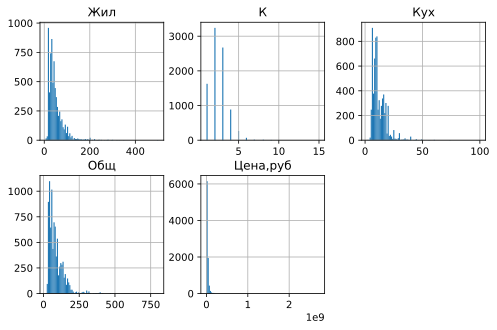

In [350]:
df.hist(bins=100, layout = (2,3), figsize = (8, 5))

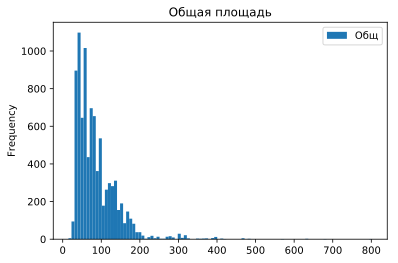

In [354]:
#определенно стоит распарсить, просуммировать, задать интервалы
general = df[['Общ']]
#general.insert(1,'Количество', 1)
general.plot(bins=100, kind='hist', rot =0, title='Общая площадь')

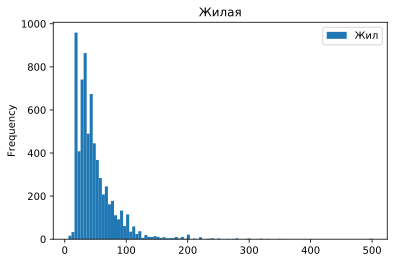

In [375]:
living = df[['Жил']]

living.plot(bins=100, kind='hist', rot = 0, title='Жилая')

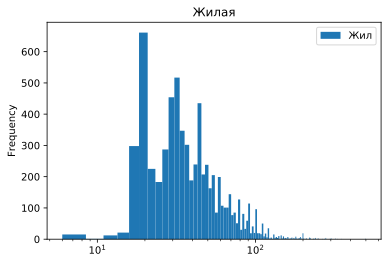

In [377]:
living.plot(bins=200, kind='hist', rot = 0, title='Жилая',logx = True)

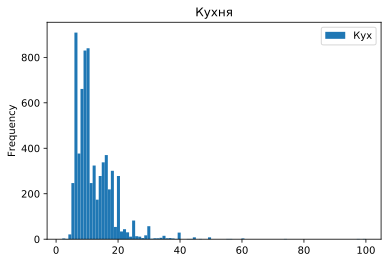

In [364]:
kitchen = df[['Кух']]
kitchen.plot(bins=100, kind='hist', rot = 0, title='Кухня')

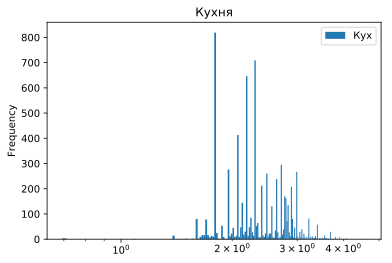

In [379]:
kitchen.plot(bins=200, kind='hist', rot = 0, title='Кухня',logx = True)

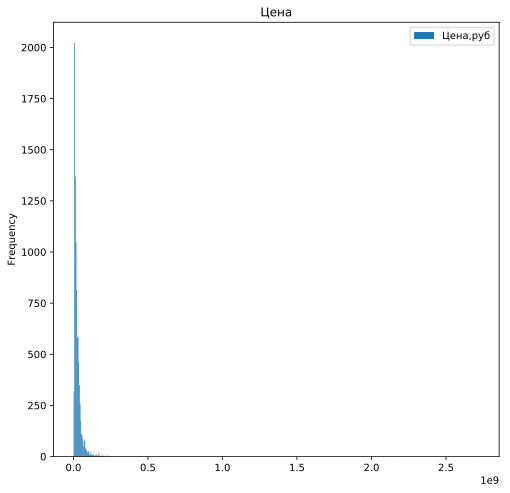

In [392]:
price = df[['Цена,руб']]
price.plot(bins=600, kind='hist', rot = 0, title='Цена',figsize = (8,8))

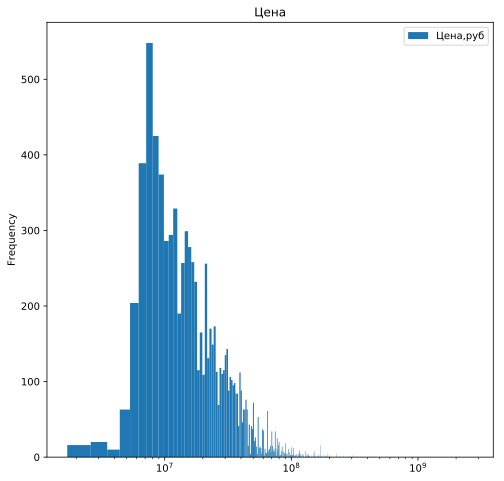

In [395]:
price.plot(bins=3000, kind='hist', rot = 0, title='Цена',figsize = (8,8),logx = True)

Найдем зависимости:

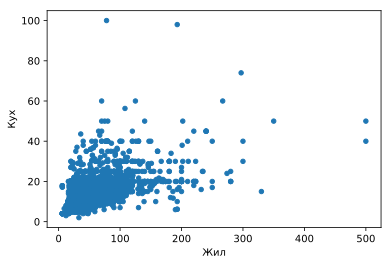

In [396]:
df.plot.scatter('Жил','Кух')

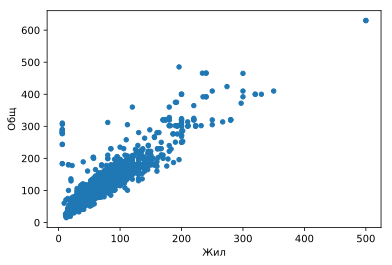

In [397]:
df.plot.scatter('Жил','Общ')

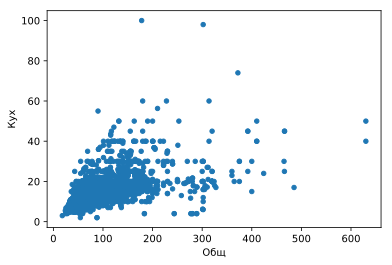

In [398]:
df.plot.scatter('Общ','Кух')

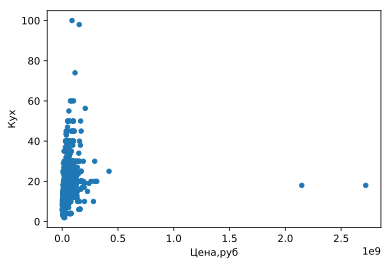

In [399]:
df.plot.scatter('Цена,руб','Кух')

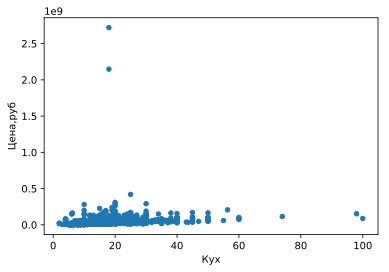

In [400]:
df.plot.scatter('Кух','Цена,руб')

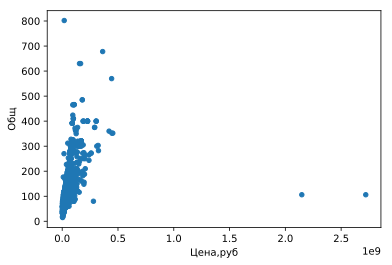

In [401]:
df.plot.scatter('Цена,руб','Общ')

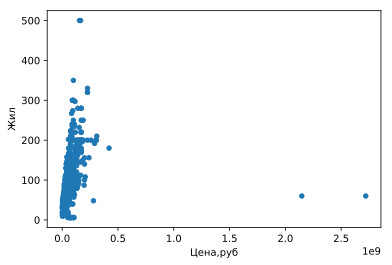

In [402]:
df.plot.scatter('Цена,руб','Жил')